In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


**Descrição do Dado**

- Age : idade do paciente
- Sex : gênero do paciente
- cp : tipo de dor no peito (1,2,3,4)
    - Value 1: angina típica
    - Value 2: angina atípica
    - Value 3: dor não angina
    - Value 4: assintomático
- trtbps : pressão sanguinea no repouso (in mm Hg)
- chol : colesterol em mg/dl,via sensor BMI
- fbs : açucar no sangue em jejum > 120 mg/dl, (1 = true; 0 = false)
- rest_ecg : resultados exame eletrocardioimagem 
    - 0: normal
    - 1: onda ST-T anormal 
    - 2: provavel hipertrofia ventricular
- thalachh: maximum heart rate achieved 
- exng: exercicio induzido angina (1 = yes; 0 = no)
- caa: número máximo de vasos (0-3)
- output : 0= menos chance de ataque cardíaco 1= mais chance de ataque cardíaco

# Manipulando DataFrames


Lendo e descrevendo a base de dados no ambiente

In [3]:
# Conferindo as dimensões da base de dados
df.shape

(303, 11)

In [4]:
# Conferindo quanis são variáveis
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'caa', 'output'],
      dtype='object')

Criando e deletanto colunas/variáveis base de dados

In [5]:
df['teste'] = df['age'] + 10
df.drop(['teste'], axis = 1, inplace=True)

Funções loc e iloc

In [6]:
#df.loc[3] # podemos chamar uma linha pelo seu índice
#df.loc[[0,1,2]] # por um array de índices
#df.loc[0:3] # por um range
#df.loc[0:3, ['gender', 'bmi']] # além dos indices, podemos selecionar colunas
#df.iloc[3] # já a função iloc seleciona pela posição, e não pelo índice
df.iloc[:, 2] # mesma coisa para a coluna

0      3
1      2
2      1
3      1
4      0
5      0
6      1
7      1
8      2
9      2
10     0
11     2
12     1
13     3
14     3
15     2
16     2
17     3
18     0
19     3
20     0
21     2
22     0
23     2
24     3
25     1
26     2
27     2
28     2
29     2
      ..
273    0
274    0
275    0
276    0
277    1
278    1
279    0
280    0
281    0
282    2
283    0
284    0
285    0
286    3
287    1
288    0
289    0
290    0
291    0
292    0
293    2
294    0
295    0
296    0
297    0
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

Seleção por condicional

In [7]:
print(f'Quantidade de pessoas com mais de 50 anos:{len(df[df["age"] > 50])}')
df[df['age'] > 50].head()

Quantidade de pessoas com mais de 50 anos:208


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1
5,57,1,0,140,192,0,1,148,0,0,1
6,56,0,1,140,294,0,0,153,0,0,1


# Estatística Descritiva

- *Variável categórica* : As variáveis categóricas contêm um número finito de categorias ou grupos distintos. Os dados categóricos podem não ter uma ordem lógica. Por exemplo, os preditores categóricos incluem gênero, tipo de material e método de pagamento.


- *Variável discreta* : Variáveis discretas são variáveis numéricas que têm um número contável de valores entre quaisquer dois valores. Uma variável discreta é sempre numérica. Por exemplo, o número de reclamações de clientes ou o número de falhas ou defeitos.


- *Variável contínua* : Variáveis contínuas são variáveis numéricas que têm um número infinito de valores entre dois valores quaisquer. Uma variável contínua pode ser numérica ou de data/hora. Por exemplo, o comprimento de uma peça ou a data e hora em que um pagamento é recebido.

In [8]:
df.dtypes

age         int64
sex         int64
cp          int64
trtbps      int64
chol        int64
fbs         int64
restecg     int64
thalachh    int64
exng        int64
caa         int64
output      int64
dtype: object

**Distribuição a variável target/resposta**

In [9]:
pd.DataFrame(df.groupby(['output']).count())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa
output,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165


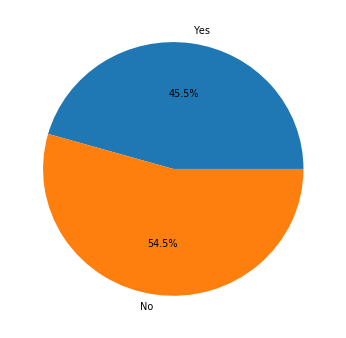

In [10]:
x = pd.DataFrame(df.groupby(['output']).count())
fig, ax = plt.subplots(figsize = (6,6), dpi = 70)
ax.pie(x['sex'], autopct='%1.1f%%', labels=['Yes', "No"])
plt.show()

**Descrevendo as variáveis numéricas**

In [11]:
num_vars = ['age','trtbps', 'chol', 'thalachh']
df[num_vars].describe()

,age,trtbps,chol,thalachh
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


Q1: O que podemos concluir?

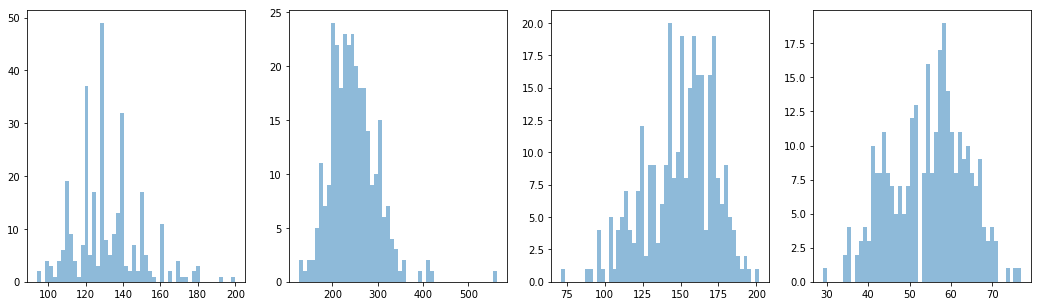

In [12]:
fig = plt.figure(figsize =(18, 5))

plt.subplot(1, 4, 1)
plt.hist(df['trtbps'], alpha=0.5, bins = 50)

plt.subplot(1, 4, 2)
plt.hist(df['chol'], alpha=0.5, bins = 50)

plt.subplot(1, 4, 3)
plt.hist(df['thalachh'], alpha=0.5, bins = 50)

plt.subplot(1, 4, 4)
plt.hist(df['age'], alpha=0.5, bins = 50)

plt.show()

Q2: As conclusões descritas em Q1 se confirmaram?

O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.

As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro quartil formam o boxplot.

![picture](imgs/boxplot.png)

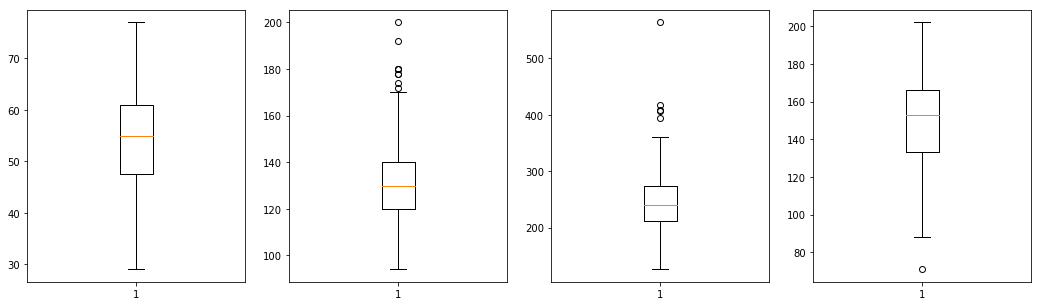

In [13]:
fig = plt.figure(figsize =(18, 5))


plt.subplot(1, 4, 1)
plt.boxplot(df[~df['age'].isnull()]['age'])

plt.subplot(1, 4, 2)
plt.boxplot(df[~df['trtbps'].isnull()]['trtbps'])

plt.subplot(1, 4, 3)
plt.boxplot(df[~df['chol'].isnull()]['chol'])

plt.subplot(1, 4, 4)
plt.boxplot(df[~df['thalachh'].isnull()]['thalachh'])

plt.show()

Q3: O que podemos extrair de informações a mais com o boxplot?

**Descrevendo as variáveis categóricas**


In [14]:
# Note que algumas variáveis apesar de serem números, na verdade representam uma categoria
categ_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'caa']

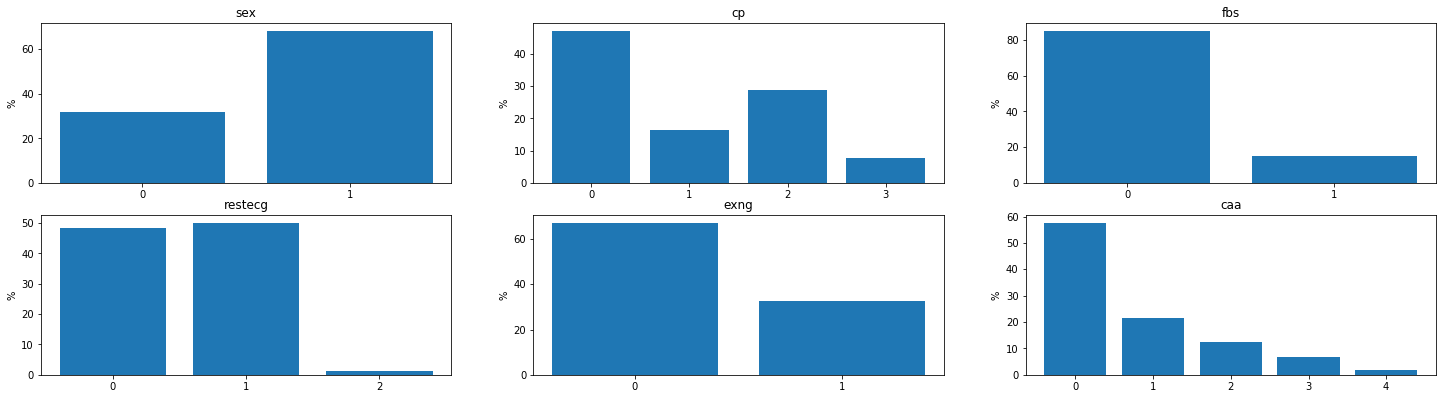

In [15]:
fig = plt.figure(figsize =(25, 10))
for i in range(len(categ_vars)):
  temp = pd.DataFrame(df.groupby(categ_vars[i]).count()['output'])
  temp['perc'] = (temp['output'] / temp['output'].sum()) * 100
  plt.subplot(3, 3, i+1)
  plt.bar(range(len(temp.index)), list(temp['perc']), tick_label=temp.index)
  plt.title(categ_vars[i])
  plt.ylabel("%")

plt.show()

# Análises de Correlação

*Correlação de Pearson*: O coeficiente de correlação de Pearson (r), também chamado de correlação linear ou r de Pearson, é um grau de relação entre duas variáveis contínuas ou discretas e exprime o grau de correlação através de valores situados entre -1 e 1

![picture2](imgs/pearson.png)


**Correlação das variáveis numéricas, com relação a resposta**

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


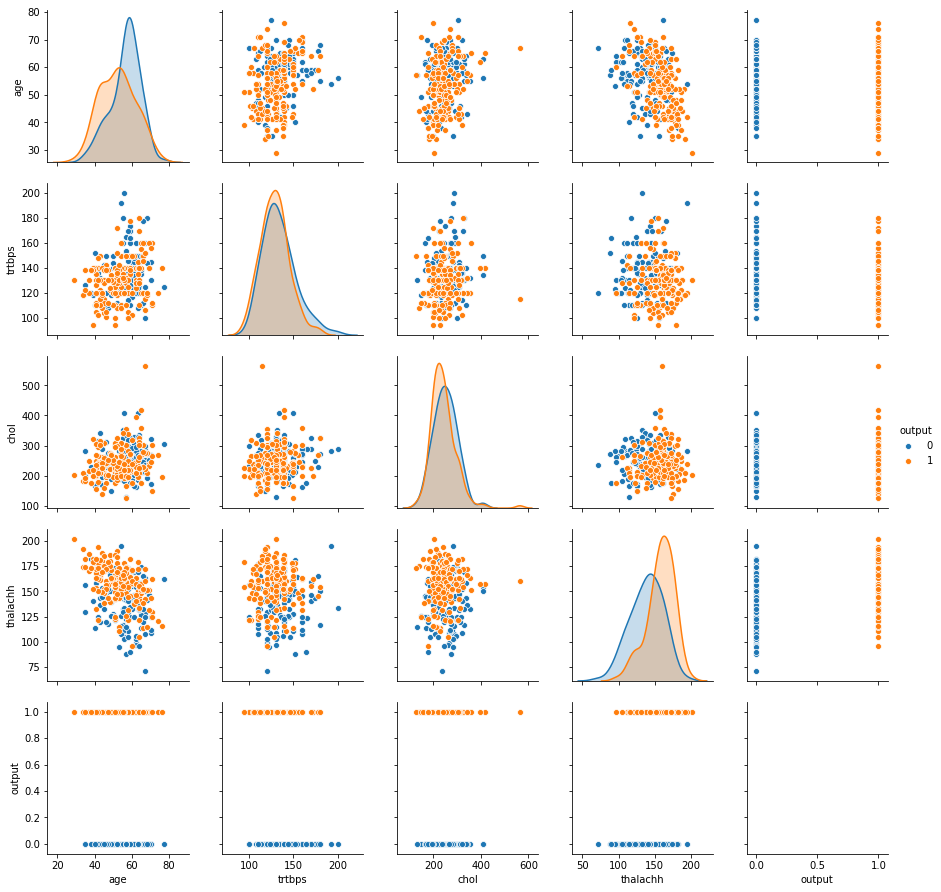

In [16]:
# Função pairplot
sns.pairplot(df[num_vars + ['output']], hue = 'output')

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


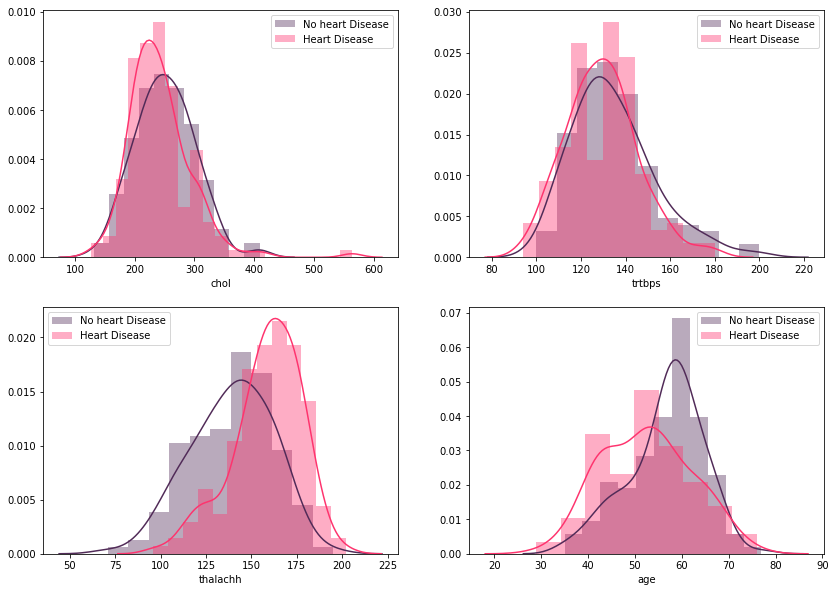

In [17]:
fig=plt.figure(figsize=(14, 10))
fig = plt.subplot(221)
sns.distplot(df[df['output'] == 0]["chol"],label='No heart Disease', color='#512b58') 
sns.distplot(df[df['output'] == 1]["chol"],label='Heart Disease', color='#fe346e')
plt.legend()

fig = plt.subplot(222)
sns.distplot(df[df['output'] == 0]["trtbps"], label='No heart Disease', color='#512b58') 
sns.distplot(df[df['output'] == 1]["trtbps"], label='Heart Disease', color='#fe346e') 
plt.legend()

fig = plt.subplot(223)
sns.distplot(df[df['output'] == 0]["thalachh"], label='No heart Disease', color='#512b58') 
sns.distplot(df[df['output'] == 1]["thalachh"], label='Heart Disease', color='#fe346e') 
plt.legend()

fig = plt.subplot(224)
sns.distplot(df[df['output'] == 0]["age"], label='No heart Disease', color='#512b58') 
sns.distplot(df[df['output'] == 1]["age"], label='Heart Disease', color='#fe346e') 
plt.legend()

**Coeficiente de Correlação**

In [18]:
df[num_vars+['output']].corr()

,age,trtbps,chol,thalachh,output
age,1.000000,0.279351,0.213678,-0.398522,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,0.421741
output,-0.225439,-0.144931,-0.085239,0.421741,1.000000


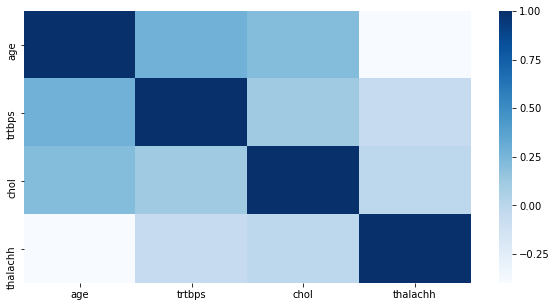

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_vars].corr(),cmap="Blues")

**Correlação de variáveis categóricas com a resposta**

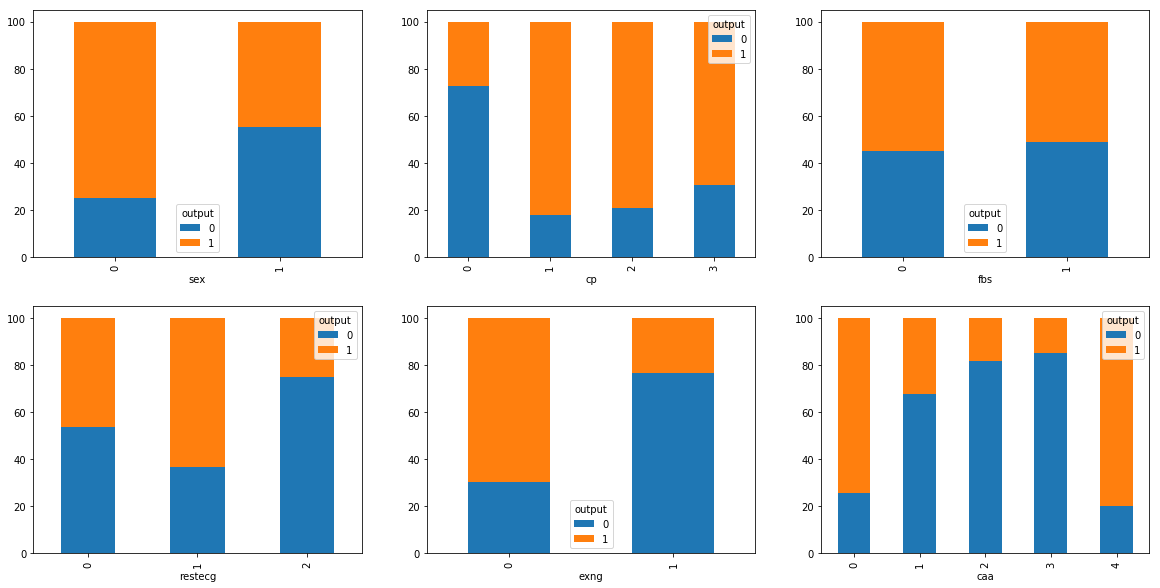

In [20]:
# Comparando as categóricas com a variável target
fig, axes = plt.subplots(nrows=2, ncols=3)
indexes = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]
for i in range(len(categ_vars)):
  c = df.groupby([categ_vars[i], 'output']).size()
  ((c / c.groupby(level=0).sum())*100).unstack().plot(kind='bar', ax=axes[indexes[i][0], indexes[i][1]], stacked=True, figsize=(20, 10))

In [22]:
df[categ_vars+['output']].corr()

,sex,cp,fbs,restecg,exng,caa,output
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,0.118261,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,-0.181053,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,0.137979,-0.028046
restecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,-0.072042,0.137230
exng,0.141664,-0.394280,0.025665,-0.070733,1.000000,0.115739,-0.436757
caa,0.118261,-0.181053,0.137979,-0.072042,0.115739,1.000000,-0.391724
output,-0.280937,0.433798,-0.028046,0.137230,-0.436757,-0.391724,1.000000


Q4: Faz sentido calcular o coeficiente de correlação com variáveis categóricas?